# Predicting Churn for Bank Customers

## Author: Emmanuel Edouard Moutoussamy (https://tinyurl.com/3f7ddem8)

The goal of this project is to (1) detect the descriptor that influence the costumer churn and (2) build a model to predict the costumer churn.

### What is costumer churn ?


Summary:
- Data exploration
- Data preprocessing
- Modeling


The dataset used is availbale on Kaggle: https://tinyurl.com/ud43n28s

## Necessary module import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [22]:
def MakeMeADonut(labels, data_count):
    """
    Plot a donut chart. Same as a pie chart but cooler ;)
    
    :param labels: labels for the donut chart
    :param data_count: count data for the donut chart
    :return: plot the donut chart
    """
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data_count,explode=(0.03,0.03),labels=labels,
                                      colors=['#982041','#2E5C91'],autopct='%1.1f%%',
                                      shadow=True,pctdistance=0.4)

    plt.setp(texts, size=18)
    plt.setp(autotexts, size=18)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.show()

### Loading dataset:

In [2]:
df = pd.read_csv('input/Churn_Modelling.csv', delimiter=',')

## 1. Data exploration

First let's see what the dataset look like:

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print("\n The dataset contains {0} rows and {1} columns\n ".format(df.shape[0],df.shape[1]))


 The dataset contains 10000 rows and 14 columns
 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset conatins 14 descriptors which can be int or string.

In [13]:
# is there missing values on the dataset:

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values on the dataset (Good news 🥳)

However, we can see that some descriptors are useless for the purpose of this project. Indeed, the row number, the customer id, and the surname do not play a role in the customer churn. These descriptors will be remove for the rest of the project

In [14]:
# Remove RowNumber, CustomerId  and Surname
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)


#let's look at the dataset:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In this dataset we can distinguished two type of descriptors: the categorical and the continuous descriptors. Let's define them for the rest of the proejct:

In [17]:
categorical_descriptors = ["gender","Geography","HasCrCard","IsActiveMember"]
continuous_descriptors = ["CreditScore", "Age", "Tenure", "Balance","NumOfProducts", "EstimatedSalary"]

### Data visualisation

First, I look at the proportion of customers who left the company on this dataset:

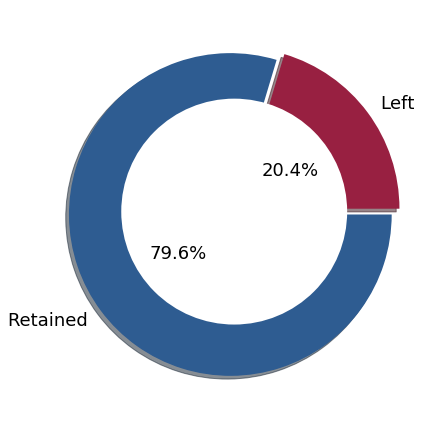

In [23]:
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

MakeMeADonut(['Left', 'Retained'], sizes)

It appears that 20.4% of the customers left the bank in this dataset.

### Let's look at the relation between the categorical variable and the churn status